# Notebook de test des données lapi post-traitees

In [638]:
%load_ext autoreload
%autoreload 
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import Connexion_Transfert as ct
import donnees_posttraitees as t
import graphs as g
import pandas as pd
import geopandas as gpd
import numpy as np
import altair as alt
import datetime as dt
#pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 50)
alt.data_transformers.enable('default', max_rows=None)
import os, math, re
from sklearn.cluster import DBSCAN
from sklearn import svm,datasets
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. import des données, traitement de mise en forme
## 1.1 Import
Les données sont importées sur la période du 24/01/19 au 23/02/19, sur laquelle il n'y a pas de manque de données à priori

In [2]:
%time df_passages_source, df_plaques, df_immat=t.ouvrir_fichier_lapi_final('2019-01-23 00:00:00','2019-02-13 23:59:59')

Wall time: 28min 39s


In [ ]:
#export au format svg des données TV
for i in range(1,20) :
    chemin=os.path.join(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\graphs\nb_veh_J_cam',f'cam{i}.svg')
    g.graph_nb_veh_jour_camera_multi_j(df_passages,'2019-01-23 00:00:00','2019-01-23 23:59:59',i,22).save(chemin)

## 1.2 Recalage temporel
> suite à pb dans la base dedonnées il faut ajouter 1h à tous les passages

## 1.3 Ajout de l'attribut de différenciation VL / PL

In [3]:
%time df_passages2=t.affecter_type(df_passages_source,df_immat)

Wall time: 3min 48s


In [4]:
%time df_passages3=t.affecter_type_nuit(df_passages2,df_immat)

Wall time: 35.6 s


### différenciation VL / PL

In [5]:
df_passages_pl=df_passages3.loc[df_passages3['l']==1].copy()
df_passages_vl=df_passages3.loc[df_passages3['l']==0].copy()

In [550]:
len(df_passages_pl)

1290439

## 1.2. Suppression des doublons

### 1.2.1 Doublons

In [6]:
%%time 
df_passages_pl_ss_doublons=t.supprimer_doublons(df_passages_pl)
df_passages_vl_ss_doublons=t.supprimer_doublons(df_passages_vl)

### 1.2.2 passages proches

In [543]:
#pour visu
%time groupe_pl_rappro, groupe_pl=t.passages_proches(df_passages_pl_ss_doublons)
jointure = g.analyse_passage_proches(groupe_pl_rappro, groupe_pl)
#g.graph_passages_proches(jointure, groupe_pl_rappro)

In [545]:
groupe_pl_rappro['nb_passg']=groupe_pl_rappro.apply(lambda x : len(x['liste_passag_faux']),axis=1)

In [ ]:
groupe_pl_rappro.nb_passg.cumsum()

In [548]:
groupe_pl_rappro

camera_id  \
immat                                                                                         
0001fb254a048b6d34b311bc39dd5f7f4261a3f6                                       (10, 18, 13)   
0006032ce8d9b88a97bf5edc4ddd26bfadaf20e2  (10, 1, 5, 12, 3, 9, 1, 5, 11, 12, 6, 4, 3, 5,...   
001b3fc1839070936df83443270d62a53becc9db                   (3, 9, 4, 10, 5, 6, 3, 4, 10, 5)   
00273fd83dd8d522f062cfa3e51d0f5551abbc0e  (4, 3, 1, 8, 18, 15, 19, 1, 3, 3, 4, 3, 4, 4, ...   
0028f8fa0d1dc22e6eb4c1c57d0caeb1efb0fbfb                           (10, 4, 5, 11, 12, 6, 3)   
00325d11cbc2368751b575b32befc5ff27eefb8d                                 (4, 10, 3, 18, 13)   
0035a4a3da05d2037412e9c6826dba87b3849235  (6, 13, 13, 6, 2, 18, 15, 19, 4, 5, 11, 12, 6,...   
0049fcaf1aabcf2d4b56c1b2c1a6baacf3de29c8                                            (5, 10)   
005728f228714ee3a531f3b6cae08f9c8c2f21e7  (3, 4, 6, 3, 9, 4, 10, 3, 4, 3, 4, 7, 8, 3, 4,...   
005a9f27ff36441aab778af90e3d145f0d12cf60  (4, 3, 3, 8, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 18,...   
005dbd31275aa3cf629160a738ff87ce79a4952e                                         (4, 10, 5)   
00622c245465b6ea42b3b03da48b2776f93f8754                            (6, 2, 9, 4, 10, 5, 11)   
006a03eadb0e5bafca39bebbdc6b2d7b231c7f8f  (8, 5, 2, 19, 1, 2, 8, 3, 4, 3, 9, 10, 4, 5, 1...   
007150aff441a171e4f2d0fbe1be0174d1e18cb4          (12, 6, 3, 9, 4, 10, 5, 11, 4, 10, 5, 11)   
0071a0f68024cd211dc9e3b8ccf66fc2640098ec  (3, 4, 10, 12, 12, 13, 8, 5, 15, 9, 7, 8, 4, 1...   
00736704c4504d1872f4d06b60400b98d1fe936c                           (12, 6, 3, 4, 5, 10, 11)   
0075b1506e0b2f32733cffc77d22233b4a5e813a    (4, 10, 5, 11, 12, 6, 7, 8, 12, 6, 3, 9, 10, 9)   
0077df3fe2fee8a8cb38d5d12fb6aea8c18443f3                                        (4, 10, 11)   
0078321723c08b08536275d007e6046763981d9c  (3, 18, 13, 15, 19, 4, 5, 6, 3, 18, 13, 15, 4,...   
0078c4a55e1c2f4415d33f79df4e60b0ae2514bc                                      (3, 10, 4, 5)   
007962a27d2b889bc05a0a69ebc7263e3ef4bd9c  (15, 18, 10, 2, 18, 4, 10, 2, 18, 15, 18, 13, ...   
0082086cdc9b5a6c8b3787a4075d0842c3bfa29e                                      (10, 5, 6, 9)   
0089cdd8ac3998ce465bf7d33b8ea97da3fdbd1a  (15, 19, 4, 5, 11, 12, 6, 3, 18, 13, 19, 4, 5,...   
0092f824896024cabb8c55ab77d45c7cb2df46e4                          (3, 15, 13, 4, 10, 5, 11)   
009a7ca70edb433379e5bbc887b9adf98626e601                            (12, 6, 3, 9, 4, 10, 5)   
00bd0ffe05fd1b3a8f8276ac7b833ab8e13bac7c  (15, 19, 4, 5, 8, 3, 18, 15, 19, 4, 5, 18, 10,...   
00be37ace6ad002d7bae259cb8e0ff2e9eeea9f7  (4, 5, 2, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4, 3, 4, ...   
00bf1f1d7080777b704a465b9e687f56f707833f  (12, 6, 3, 18, 19, 5, 4, 10, 5, 11, 4, 10, 5, 11)   
00c4c1e1bc1626517fa5fb1399130a8c293ab5fc                           (8, 3, 18, 4, 5, 10, 11)   
00c96b81159d6c34366e05a59aaa5d5428210180         (12, 6, 3, 10, 11, 12, 6, 3, 4, 10, 5, 11)   
...                                                                                     ...   
ff61cdbc74f61e9945cb09bf99d4adf54c43450b  (4, 5, 2, 9, 4, 10, 3, 1, 2, 4, 5, 6, 3, 2, 5,...   
ff6939c68a21dea843a53bb88b959f6a523a1222  (10, 5, 3, 9, 4, 10, 9, 4, 10, 5, 3, 9, 10, 4,...   
ff6f3539eccd9715599e781be1063785a3c6529c  (3, 18, 13, 4, 10, 5, 11, 12, 6, 3, 15, 19, 4, 5)   
ff701018487be45b7e7132f6a07905d8b25730ab                   (4, 5, 10, 11, 12, 6, 3, 18, 13)   
ff725037809cefcf0bd9a990f0d687d8efbb8492  (15, 19, 9, 15, 19, 1, 3, 9, 4, 5, 6, 3, 9, 15...   
ff769c9684ba6a64a89227077f63b484cacc837d                                   (2, 9, 4, 10, 5)   
ff7b5aa8ef51dbf154561a2c0355c15e4c344a56                             (18, 10, 13, 15, 4, 5)   
ff7eeca0cdae5663a385f24c57aff50287269d14  (4, 10, 3, 9, 4, 10, 3, 9, 10, 9, 4, 10, 3, 18...   
ff7fd4c30351b466ace27a6739531a2e7de44a5d                                   (4, 6, 4, 10, 5)   
ff83067b74be8c59478fc18e2adf864b21e8dc8f       (12, 6, 3, 4, 10, 5, 11, 12, 6, 3, 4, 10, 5) 

In [7]:
%%time 
#pour traitement
passg_pl_recale_cam10=t.recalage_cam10(df_passages_pl_ss_doublons)
passg_vl_recale_cam10=t.recalage_cam10(df_passages_vl_ss_doublons)

Wall time: 5min 28s
Parser   : 101 ms


## 1.4. Filtre des immatriculations non cohérentes

In [8]:
%%time 
df_passages_immat_ok, df_immat_suppr=t.filtre_plaque_non_valable(passg_pl_recale_cam10, df_plaques)
df_passages_immat_vl_ok, df_immat_suppr=t.filtre_plaque_non_valable(passg_vl_recale_cam10, df_plaques)

Wall time: 19min 37s


## 1.5 Comparaison lapi - gestionnaire
> Utile pour comparer avec les données gestionnaire, voir avec Gille si donnes de gestionnaires mises en forme

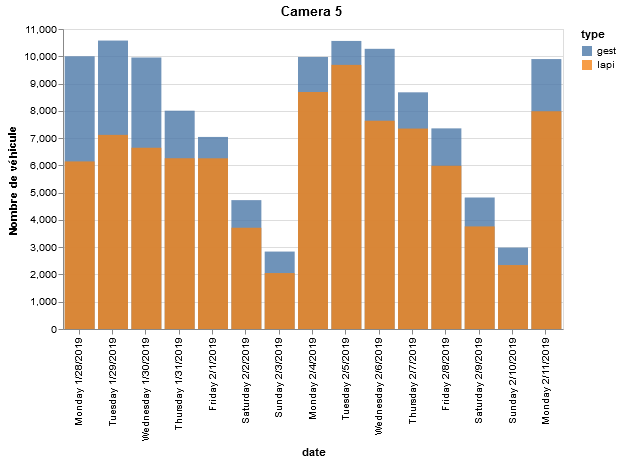

In [333]:
#comparaison des données sur une camera
g.comp_lapi_gest(df_passages_immat_ok,t.donnees_gest,5)

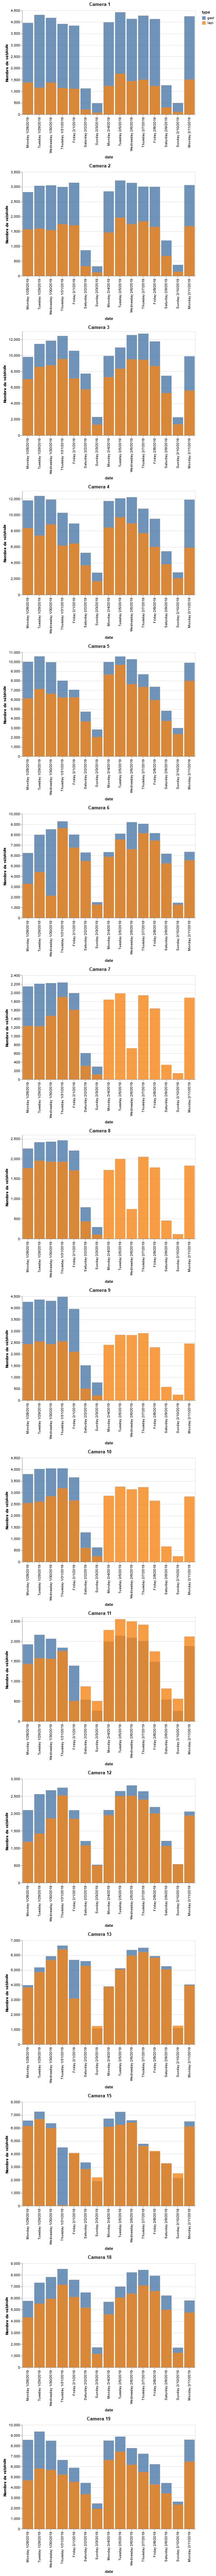

In [330]:
#comparaison des données sur plsuieurs camera
g.comp_lapi_gest_multicam(df_passages_immat_ok,t.donnees_gest)

In [362]:
nb_pl_j_cam=df_passages_immat_ok.groupby('camera_id').resample('D').count()['immat'].reset_index().rename(columns={'immat':'nb_veh'})
comp_lapi_gest=nb_pl_j_cam.merge(t.donnees_gest, on=['created','camera_id'])
comp_lapi_gest['pct_comp']=comp_lapi_gest['nb_veh_x']/comp_lapi_gest['nb_veh_y']*100
comp_lapi_gest.rename(columns={'nb_veh_x':'trafic_lapi','nb_veh_y':'trafic_gest'},inplace=True)
comp_lapi_gest.loc[comp_lapi_gest['camera_id']==5]
comp_lapi_gest['pr_grp']=comp_lapi_gest.apply(lambda x : 'du 28/01 au 30/01' if x['created'].day in range(23,31) else 'du 31/01 au 13/02', axis=1)
comp_lapi_gest.groupby(['camera_id','pr_grp'])['pct_comp'].median().reset_index()

camera_id             pr_grp    pct_comp
0           1  du 28/01 au 30/01   32.966507
1           1  du 31/01 au 13/02   29.568917
2           2  du 28/01 au 30/01   52.801582
3           2  du 31/01 au 13/02   54.951738
4           3  du 28/01 au 30/01   74.201723
5           3  du 31/01 au 13/02   73.782242
6           4  du 28/01 au 30/01   70.899695
7           4  du 31/01 au 13/02   71.022968
8           5  du 28/01 au 30/01   66.763761
9           5  du 31/01 au 13/02   79.619123
10          6  du 28/01 au 30/01   52.347380
11          6  du 31/01 au 13/02   87.375193
12          7  du 28/01 au 30/01   57.575758
13          7  du 31/01 au 13/02   66.442360
14          8  du 28/01 au 30/01   79.580074
15          8  du 31/01 au 13/02   66.501620
16          9  du 28/01 au 30/01   57.156265
17          9  du 31/01 au 13/02   43.550461
18         10  du 28/01 au 30/01   67.061611
19         10  du 31/01 au 13/02   60.601987
20         11  du 28/01 au 30/01   74.674987
21         11  du 31/01 au 13/02  119.538216
22         12  du 28/01 au 30/01   56.720686
23         12  du 31/01 au 13/02   91.854625
24         13  du 28/01 au 30/01   95.770138
25         13  du 31/01 au 13/02   97.375291
26         15  du 28/01 au 30/01   93.705228
27         15  du 31/01 au 13/02   97.095020
28         18  du 28/01 au 30/01   75.446733
29         18  du 31/01 au 13/02   80.863857
30         19  du 28/01 au 30/01   62.119432
31         19  du 31/01 au 13/02   77.923366

# 2. Identifier les trajets de transit

In [9]:
dico_od,  dico_passag, dico_tps_max=t.transit_temps_complet('2019-01-23 00:00:00',22,df_passages_immat_ok)

date : 2019-01-23 00:00:00 debut_traitement : 2019-06-15 21:35:36.325325
date : 2019-01-24 00:00:00 debut_traitement : 2019-06-15 21:36:31.374768
date : 2019-01-25 00:00:00 debut_traitement : 2019-06-15 21:37:26.174376
date : 2019-01-26 00:00:00 debut_traitement : 2019-06-15 21:38:20.520978
date : 2019-01-27 00:00:00 debut_traitement : 2019-06-15 21:39:07.134983
date : 2019-01-28 00:00:00 debut_traitement : 2019-06-15 21:39:44.844866
date : 2019-01-29 00:00:00 debut_traitement : 2019-06-15 21:40:49.564056
date : 2019-01-30 00:00:00 debut_traitement : 2019-06-15 21:42:04.405831
date : 2019-01-31 00:00:00 debut_traitement : 2019-06-15 21:43:20.512928
date : 2019-02-01 00:00:00 debut_traitement : 2019-06-15 21:44:43.368445
date : 2019-02-02 00:00:00 debut_traitement : 2019-06-15 21:46:16.330933
date : 2019-02-03 00:00:00 debut_traitement : 2019-06-15 21:47:43.794770
date : 2019-02-04 00:00:00 debut_traitement : 2019-06-15 21:48:56.949413
date : 2019-02-05 00:00:00 debut_traitement : 2019-

# 3. Filtrer les trajets selon un temps de parcours

## 3.1 Dataframe des temps de parcours de base

In [10]:
%time dixco_tpsmax_corrige=t.corriger_df_tps_parcours(dico_tps_max)

Wall time: 2.48 s


## 3.2 Identification du trafic de transit sans marge

In [11]:
#affectation des temps de parcours de reference
%time df_transit_tps_ref=t.jointure_temps_reel_theorique(dico_od,dixco_tpsmax_corrige,t.liste_complete_trajet)

Wall time: 2min 14s


In [12]:
#df des transit avec marge 0 ss extrapolation
%time df_transit_marge0_ss_extrapolation=t.identifier_transit(df_transit_tps_ref, 0)

Wall time: 21.5 s


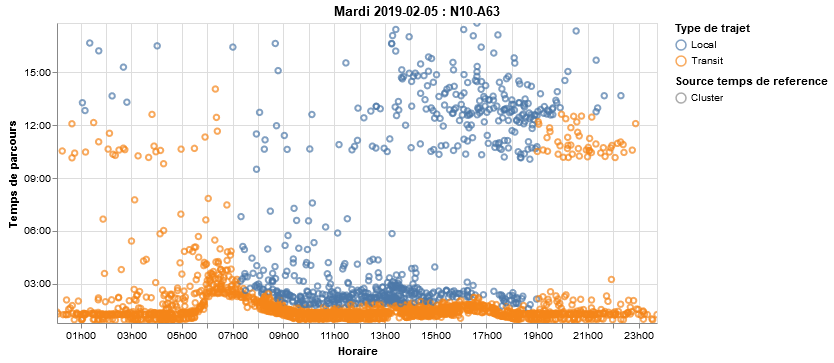

In [142]:
g.graph_transit_filtre(df_transit_marge0_ss_extrapolation,'2019-02-05 00:00:00', '2019-02-05 23:59:59','N10-A63')

## 3.3 Extrapolation pour recuperer les trajets manquants 

In [14]:
%%time
liste_od_ok=['A660-A62','A62-A63','A63-A62','A62-A10','A660-N10', 'A660-A10','N10-A63','A62-N10']
df_transit_extrapole=df_transit_marge0_ss_extrapolation.copy()
for od in [x for x in  df_transit_marge0_ss_extrapolation.o_d.unique().tolist() if x not in liste_od_ok ] : 
    for date in set([a[0].strftime('%Y-%m-%d') for a in t.creer_liste_date('2019-01-23',22)]):
            try : 
                 df_transit_extrapole=t.predire_type_trajet(df_transit_extrapole, od,date,600,35)
            except ValueError : 
                continue

Wall time: 6min 36s


***exemple d'impact de l'extrapolation***

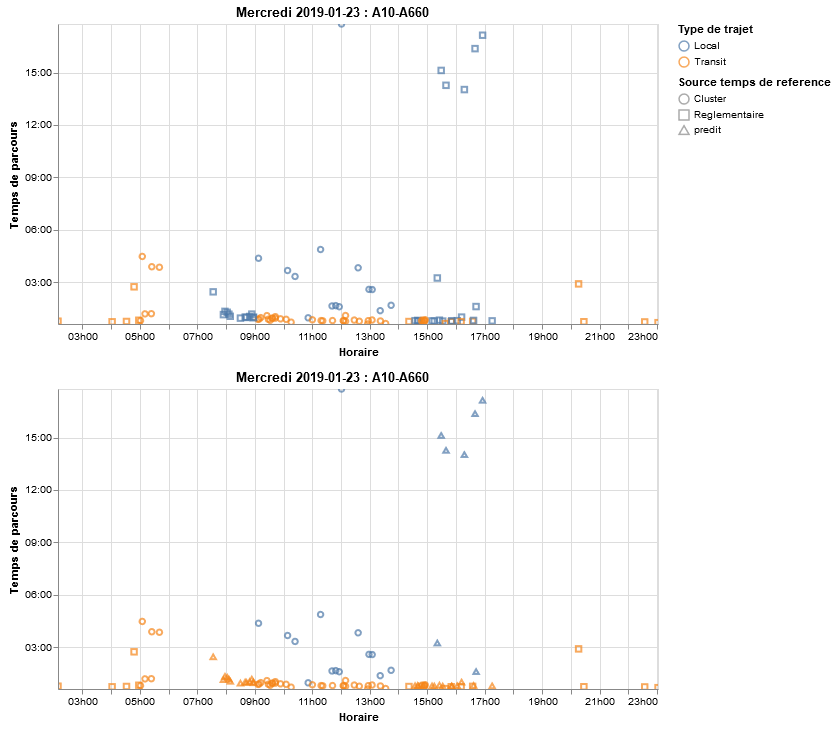

In [191]:
alt.vconcat(g.graph_transit_filtre_multiple(dico_df_transit['df_transit_marge0'],'2019-01-23 00:00:00', '2019-01-23 23:59:59','A10-A660', 1),
g.graph_transit_filtre_multiple(df_transit_extrapole,'2019-01-23 00:00:00', '2019-01-23 23:59:59','A10-A660', 1))            

***modification du dico des temps max avec ajout des temps de référence issu de l'extrapolation***

In [15]:
#localiser les periodes et o-d avec un temps de référence modifié
%time dixco_tpsmax_corrige=t.corriger_tps_parcours_extrapole(dixco_tpsmax_corrige,df_transit_extrapole)

Wall time: 1.2 s


## 3.4 Prendre en compte les aires entre Cestas et A63
> L'idée est que si le PL fait un trajet depuis ou vers A63 et qu'il est vu à Cestas, alors on va prendre en compte comm etemps de référence le temps entre Cestas et la l'entrée ou la sortuie du dispositif LAPI, pour s'abroger des temps de pause sur les grosses aires de A63

In [16]:
#creation des attributs relatifs a Cestas, pour les PL sur une O-D liées à A63, non identifiés comme transit, et qui ont été vus à Cestas
%time df_transit_A63_redresse=t.correction_temps_cestas(df_transit_extrapole,df_passages_immat_ok,dixco_tpsmax_corrige)

Wall time: 1min 50s


## 3.5 appliquer une marge 

In [17]:
%%time
#appliquer la martge sur les donnees issu de l'extrapolation et sur celle issues de la prise ene compte des aires
dico_df_transit={}
for i in [0,15,30,45,60,90] :
    dico_df_transit['df_transit_extrapole_marge'+str(i)]=t.identifier_transit(df_transit_extrapole, i)
    dico_df_transit['df_transit_airesA63_marge'+str(i)]=t.identifier_transit(df_transit_A63_redresse, i,'temps_filtre_cestas','tps_parcours_cestas')
#mettre en forme les données de prise en compte des aires
for i in [0,15,30,45,60,90] :
    dico_df_transit['df_transit_airesA63_marge'+str(i)]=t.forme_df_cestas(dico_df_transit['df_transit_airesA63_marge'+str(i)])
#concatener les 2 donnees
for i in [0,15,30,45,60,90] :
    dico_df_transit['df_transit_marge'+str(i)]=pd.concat([dico_df_transit['df_transit_airesA63_marge'+str(i)],
                                                         dico_df_transit['df_transit_extrapole_marge'+str(i)]],sort=False)
#remplir les valeurs NaN de correction_o_d
for i in [0,15,30,45,60,90] :
    dico_df_transit['df_transit_marge'+str(i)].correction_o_d=(dico_df_transit['df_transit_marge'+str(i)].
                                                               correction_o_d.fillna(False).copy())

Wall time: 2min 37s
Parser   : 109 ms


In [90]:
#exemple de visu sur 3 semaines
for od in dico_df_transit['df_transit_marge0'].o_d.unique(): 
    for i in [0,15,30,45,600] :
        nom_chemin=r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\graphs\transit_J_OD\marge_'+str(i)+'_min'
        chemin=os.path.join(nom_chemin,f'{od}.svg')
        g.graph_transit_filtre_multiple(dico_df_transit['df_transit_marge'+str(i)],'2019-01-23 00:00:00', '2019-01-23 23:59:59',od, 22).save(chemin)

***Impact de la marge***

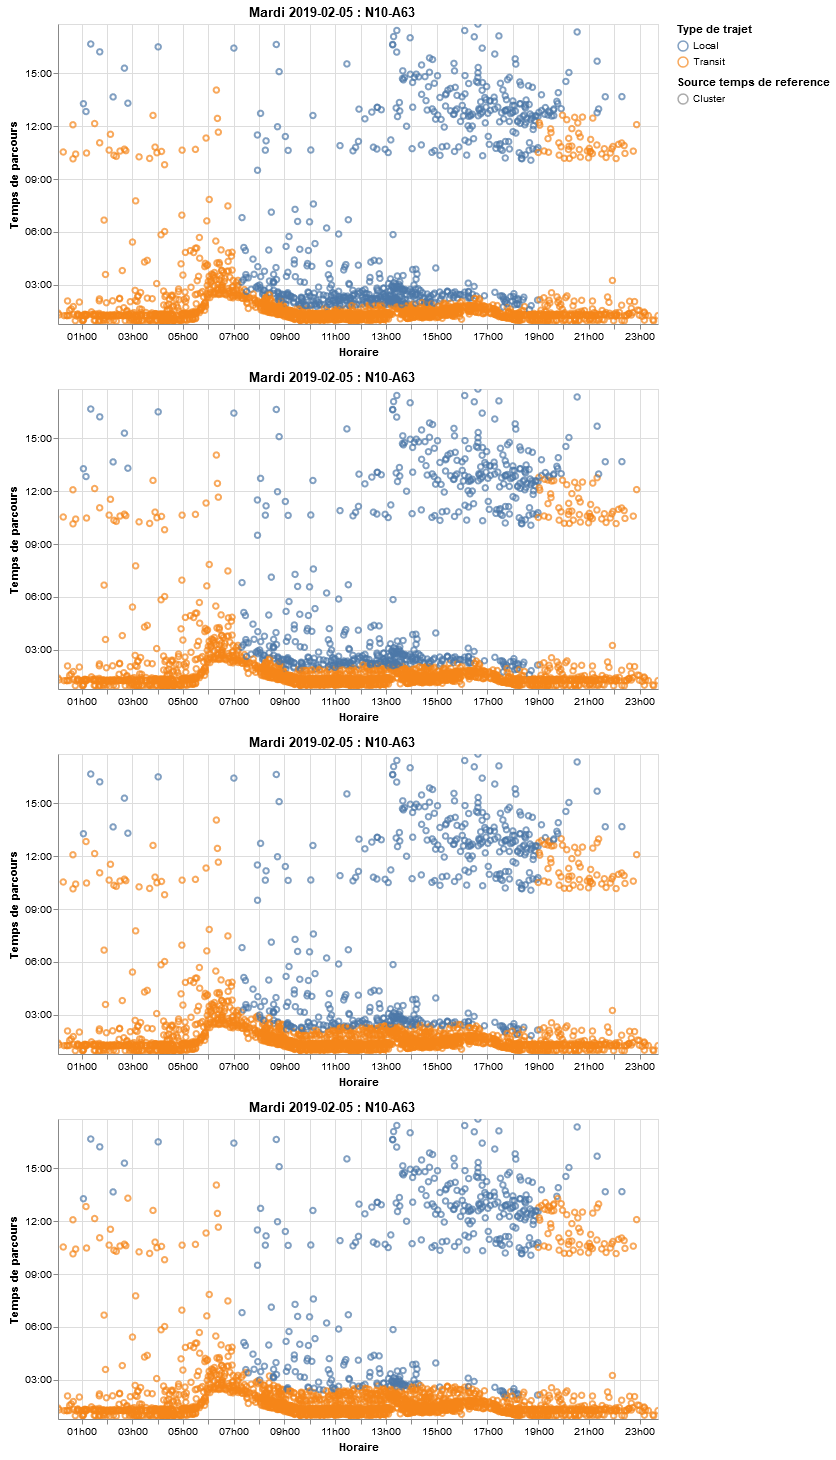

In [139]:
alt.vconcat(g.graph_transit_filtre(dico_df_transit['df_transit_marge0'],'2019-02-05 00:00:00', '2019-02-05 23:59:59','N10-A63'),
            g.graph_transit_filtre(dico_df_transit['df_transit_marge15'],'2019-02-05 00:00:00', '2019-02-05 23:59:59','N10-A63'),
            g.graph_transit_filtre(dico_df_transit['df_transit_marge30'],'2019-02-05 00:00:00', '2019-02-05 23:59:59','N10-A63'),
            g.graph_transit_filtre(dico_df_transit['df_transit_marge45'],'2019-02-05 00:00:00', '2019-02-05 23:59:59','N10-A63'))

***Filtre des données***

In [37]:
%%time
dico_df_od_ok={'df_od_ok_marge'+str(i):dico_df_transit['df_transit_marge'+str(i)].loc[dico_df_transit['df_transit_marge'+str(i)]['filtre_tps']==1]
         for i in [0,15,30,45,60,90]}
#dico_df_passag_ok={'df_passag_ok_marge'+str(i):t.trajet2passage(dico_df_od_ok['df_od_ok_marge'+str(i)],dico_passag) for i in [0,15,30,45,600]}

Wall time: 5.51 s


# 4. Correction des trajets depuis ou vers A660 relatifs à A63

In [21]:
%%time 
#recuperer les passages correspondant aux trajets identifies
dico_passag_avantcorr={'passag_avantcorr'+str(i):
                   t.trajet2passage(dico_df_od_ok ['df_od_ok_marge'+str(i)],df_passages_immat_ok) 
                   for i in [0,15,30,45,60,90]}

Wall time: 1h 53min 26s
Compiler : 156 ms


In [47]:
%%time 
dico_corr_A63_A660={'corr_A63_A660'+str(i):
                    t.correction_trajet(df_passages_immat_ok, dico_df_od_ok ['df_od_ok_marge'+str(i)])
                    for i  in [0,15,30,45,60,90]}

Wall time: 5h 42min
Compiler : 158 ms


# 5. Extrapolation des trajets non complets

In [49]:
dico_df_od_final={}

In [331]:
%%time
for i  in [60,90]:
    df_filtre_A63,df_passage_transit,df_non_transit=(t.param_trajet_incomplet('2019-01-23 00:00:00',
        dico_corr_A63_A660['corr_A63_A660'+str(i)],df_passages_immat_ok,
        dico_passag_avantcorr['passag_avantcorr'+str(i)]))
    trajet_transit_incomplet2, passage2=t.transit_trajet_incomplet(df_filtre_A63,df_passage_transit,'2019-01-23 00:00:00',22, df_passages_immat_ok)
    #affectation des temps de parcours de reference
    df_transit_incomplet_tps_ref=t.jointure_temps_reel_theorique(trajet_transit_incomplet2,dixco_tpsmax_corrige,t.liste_trajet_incomplet,'incomplet')
    #Maj de l'attruibut drapeau et Maj des autres attruibuts
    df_transit_incomplet_tps_ref=t.identifier_transit(df_transit_incomplet_tps_ref, 0)
    #mettre en forme les attributs
    df_transit_incomplet_tps_ref=df_transit_incomplet_tps_ref[['date_cam_1', 'immat', 'state', 'l', 'date_cam_2', 'cameras', 'origine',
           'destination', 'o_d', 'tps_parcours', 'period', 'date', 'temps', 'type',
           'tps_parcours_theoriq','temps_filtre', 'filtre_tps']]
    #filtrer le df : 
    df_transit_incomplet_tps_ref_final=df_transit_incomplet_tps_ref.loc[df_transit_incomplet_tps_ref['filtre_tps']==1].copy()
    #ajouter l'attribut d'identification des trajets 
    df_transit_incomplet_tps_ref_final['correction_o_d']=True
    df_transit_incomplet_tps_ref_final['correction_o_d_type']='extrapole'
    #6. Ajouter au df des o_d précédents : 
    dico_df_od_final['df_od_final_marge'+str(i)]=pd.concat([dico_corr_A63_A660['corr_A63_A660'+str(i)],df_transit_incomplet_tps_ref_final],sort=False)

date : 2019-01-23 00:00:00 debut_traitement : 2019-06-18 00:16:20.063249
date : 2019-01-24 00:00:00 debut_traitement : 2019-06-18 00:30:16.601270
date : 2019-01-25 00:00:00 debut_traitement : 2019-06-18 00:39:59.573809
date : 2019-01-26 00:00:00 debut_traitement : 2019-06-18 00:47:52.041066
date : 2019-01-27 00:00:00 debut_traitement : 2019-06-18 00:53:28.868229
date : 2019-01-28 00:00:00 debut_traitement : 2019-06-18 00:56:16.736125
date : 2019-01-29 00:00:00 debut_traitement : 2019-06-18 01:03:01.924782
date : 2019-01-30 00:00:00 debut_traitement : 2019-06-18 01:09:19.243753
date : 2019-01-31 00:00:00 debut_traitement : 2019-06-18 01:17:14.133941
date : 2019-02-01 00:00:00 debut_traitement : 2019-06-18 01:20:54.457936
date : 2019-02-02 00:00:00 debut_traitement : 2019-06-18 01:24:32.001280
date : 2019-02-03 00:00:00 debut_traitement : 2019-06-18 01:27:29.866278
date : 2019-02-04 00:00:00 debut_traitement : 2019-06-18 01:29:26.167448
date : 2019-02-05 00:00:00 debut_traitement : 2019-

In [332]:
#sauvegarder les resultats
for i in [0,15,30,45,60,90]:
    nomfichier=f'marge{i}min.json'
    dico_df_od_final['df_od_final_marge'+str(i)].reset_index().drop(['level_0','index'],axis=1).to_json(
        os.path.join(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Projet Rapport\resultats',nomfichier),orient='index')

# 6. Créer les tableaux de matrice o_d

## 6.1 Resultats

### 6.1.1 Nb total de veh sur la periode

In [114]:
# dico des o-d nombre total
dico_mat_od={'mat_od_marge'+str(i):pd.pivot_table(dico_df_od_ok['df_od_ok_marge'+str(i)],values='l', index='origine', 
                                                  columns='destination',aggfunc='count', margins=True).fillna('NC') for i in [0,15,30,45,600]}

In [130]:
mat_od_tot=pd.pivot_table(dico_df_od_final['df_od_final_marge45'],values='l', index='origine', 
                                                  columns='destination',aggfunc='count', margins=True).fillna('NC')
mat_od_tot_calcul=pd.pivot_table(dico_df_od_final['df_od_final_marge45'],values='l', index='origine', 
                                                  columns='destination',aggfunc='count').fillna('NC')
mat_od_tot

destination    A10    A62    A63  A660   A89    N10     All
origine                                                    
A10             NC   5972  12453  1809   332     NC   20566
A62           6105     NC    798  1027  1058   7298   16286
A63          11996    495     NC    NC  2975  57743   73209
A660          1572    868     NC    NC   964   5147    8551
A89            299    966   4046  1292    NC     NC    6603
N10             NC   4767  47329  4629    NC     NC   56725
All          19972  13068  64626  8757  5329  70188  181940

### 6.1.2 mjo, mjo+samedi, mja

Pour faire du MJO il faut connaitre les dates à enlever de certaines O-D car il ya des trous dans les données, cf Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\donnees_verif_fiabilite\Synthese_absence_donnees.ods

depuis N10 : supprimer les 29/01 et 30/01<br>vers A10 supprimer le 01/02<br>vers A62 supprimer le 24/01<br>depuis A63 supprimer le 31/01<br>depuis A89 supprimer le 06/02<br>vers A89 supprimer le 06/02

In [456]:
# filtre des dates selon les jours indisponible pour supprimer tout la journee
df_transit_filtre=dico_df_od_final['df_od_final_marge45'].loc[dico_df_od_final['df_od_final_marge45'].apply(lambda x : 
not (x['cameras'][0]==6 and (x['date_cam_1'].day==pd.to_datetime('2019-01-29').day or x['date_cam_1'].day==pd.to_datetime('2019-01-30').day)) and 
not (x['cameras'][-1]==11 and x['date_cam_1'].day==pd.to_datetime('2019-02-01').day) and 
not (x['cameras'][-1]==9 and x['date_cam_1'].day==pd.to_datetime('2019-01-24').day) and
not (x['cameras'][0]==15 and x['date_cam_1'].day==pd.to_datetime('2019-01-31').day) and 
not (x['cameras'][-1]==7 and x['date_cam_1'].day==pd.to_datetime('2019-02-06').day) and 
not (x['cameras'][0]==8 and x['date_cam_1'].day==pd.to_datetime('2019-02-06').day),axis=1)]

In [458]:
#filtre des dates pour supprimer les WE
df_transit_jo=df_transit_filtre.loc[df_transit_filtre.set_index('date_cam_1').index.dayofweek<5]

In [128]:
#matrice_o_d jours ouvres
mat_o_d_jo_marge45=round(pd.pivot_table(df_transit_jo,values='l', index='origine', columns='destination',aggfunc='count')/t.matrice_nb_jo,0)
mat_o_d_jo_marge45

In [129]:
pd.pivot_table(df_transit_jo,values='l', index='origine', columns='destination',aggfunc='count')

destination     A10     A62      A63    A660     A89      N10
origine                                                      
A10             NaN  5277.0  10189.0  1528.0   301.0      NaN
A62          5545.0     NaN    765.0   995.0   976.0   6991.0
A63          9765.0   447.0      NaN     NaN  2577.0  46931.0
A660         1346.0   798.0      NaN     NaN   885.0   4588.0
A89           267.0   822.0   3491.0  1159.0     NaN      NaN
N10             NaN  3981.0  34530.0  3661.0     NaN      NaN

## 6.2 Illsutrations impacts des paramètres

### 6.2.1 Impact methode de prediction sur marge0

In [160]:
pd.pivot_table(dico_extrapole_prediction['marge15'].loc[dico_extrapole_prediction['marge15']['filtre_tps']==1],values='l', index='origine', 
                                                  columns='destination',aggfunc='count', margins=True).fillna('NC')

destination    A10    A62    A63   A660   A89    N10     All
origine                                                     
A10             NC   5643   8459   2469   341     NC   16912
A62           5489     NC    362   1100  1015   6909   14875
A63           8002    266     NC     NC  2031  41587   51886
A660          2093    834     NC     NC  1129   8239   12295
A89            292    937   2924   1551    NC     NC    5704
N10             NC   4536  34111   7461    NC     NC   46108
All          15876  12216  45856  12581  4516  56735  147780

### 6.2.2 Impact redressement vaeurs A63 et A660

In [173]:
# donnees de base
pl_transit_base=df_transit_marge0_ss_extrapolation.loc[df_transit_marge0_ss_extrapolation['filtre_tps']==1].copy()

In [175]:
pd.pivot_table(pl_transit_base, values='l',index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')

destination    A10    A62    A63   A660   A89    N10     All
origine                                                     
A10             NC   5265   7658   1954   182     NC   15059
A62           5183     NC    306    740   734   6664   13627
A63           7400    202     NC     NC  1654  39887   49143
A660          1869    577     NC     NC   784   7882   11112
A89            207    659   2340   1125    NC     NC    4331
N10             NC   4143  32739   7086    NC     NC   43968
All          14659  10846  43043  10905  3354  54433  137240

In [169]:
# donnees redressee
pd.pivot_table(df_od_corrige,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')

destination    A10    A62    A63   A660   A89    N10     All
origine                                                     
A10             NC   5265   7666   1946   182     NC   15059
A62           5183     NC    332    714   734   6664   13627
A63           7760    233     NC     NC  1767  40181   49941
A660          1509    546     NC     NC   671   7588   10314
A89            207    659   2402   1063    NC     NC    4331
N10             NC   4143  32839   6986    NC     NC   43968
All          14659  10846  43239  10709  3354  54433  137240

### 6.2.3 impact trajets non complet

In [272]:
pd.pivot_table(df_od_final,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')

destination    A10    A62    A63   A660   A89    N10     All
origine                                                     
A10             NC   5298   7666   1946   182     NC   15092
A62           5183     NC    332    714   741   6692   13662
A63           7760    235     NC     NC  1777  40482   50254
A660          1509    546     NC     NC   671   7588   10314
A89            207    665   2402   1063    NC     NC    4337
N10             NC   4158  32839   6986    NC     NC   43983
All          14659  10902  43239  10709  3371  54762  137642

### 6.2.4 impact prise en compte aires

In [136]:
dico_df_transit['df_transit_extrapole_marge0'].loc[dico_df_transit['df_transit_extrapole_marge0']['filtre_tps']==1].pivot_table(
    values='l', index='origine', columns='destination',aggfunc='count').fillna('NC')

destination   A10   A62    A63  A660   A89    N10
origine                                          
A10            NC  5265   7658  1954   182     NC
A62          5183    NC    306   740   734   6664
A63          7400   202     NC    NC  1654  39887
A660         1869   577     NC    NC   784   7882
A89           207   659   2340  1125    NC     NC
N10            NC  4143  32739  7086    NC     NC

In [137]:
dico_df_transit['df_transit_airesA63_marge0'].loc[dico_df_transit['df_transit_extrapole_marge0']['filtre_tps']==1].pivot_table(
    values='l', index='origine', columns='destination',aggfunc='count').fillna('NC')

destination   A10  A62   A63  A89   N10
origine                                
A10            NC   NC  2336   NC    NC
A62            NC   NC   440   NC    NC
A63          2411  138    NC  474  7384
A89            NC   NC   772   NC    NC
N10            NC   NC  6874   NC    NC

# 7. Différeciation Rocade Est-Ouest
>Cette analyse ne concerne que les trajets N10-A63, A10-A63, N10-A660, A10-A660

In [57]:
pivot_type_rocade

type_rocade  Autre    Est  Ouest    All
o_d                                    
A10-A63        474   4126    153   4753
A10-A660       159    597     38    794
A63-A10        715   3053     38   3806
A660-A10       248    669     10    927
A660-N10      1184   2892     40   4116
N10-A63       2106  19016    644  21766
N10-A660       589   2205    101   2895
All           5475  32558   1024  39057

# 7. Analyse du nb de VL, PL, PL en transit par heure et par camera 
> Le pb c'est que pour les camera de la Rocade, parfois on les PL n'y sont pas vus, de même pour les chemins extrapoles ou pour ceux corrigés : le passage soit n'existe pas, soit la camera du passage ne correspond pas à la destination finalement utilisées

## 7.1 base : travail sur les données telles que créees

In [373]:
#passages de transit
passages_transit=t.trajet2passage(dico_df_od_final['df_od_final_marge45'],df_passages_immat_ok)

In [459]:
#filtrer les passages de transit selon les jours avec pb
passages_transit_filtre=passages_transit.loc[passages_transit.apply(lambda x : 
not (x['camera_id']==6 and (x['created'].day==pd.to_datetime('2019-01-29').day or x['created'].day==pd.to_datetime('2019-01-30').day)) and 
not (x['camera_id']==11 and x['created'].day==pd.to_datetime('2019-02-01').day) and 
not (x['camera_id']==9 and x['created'].day==pd.to_datetime('2019-01-24').day) and
not (x['camera_id']==15 and x['created'].day==pd.to_datetime('2019-01-31').day) and 
not (x['camera_id']==7 and x['created'].day==pd.to_datetime('2019-02-06').day) and 
not (x['camera_id']==8 and x['created'].day==pd.to_datetime('2019-02-06').day),axis=1)]

In [460]:
%time synth_pl=t.pourcentage_pl_camera(df_passages_immat_ok,passages_transit_filtre)

Wall time: 2.69 s


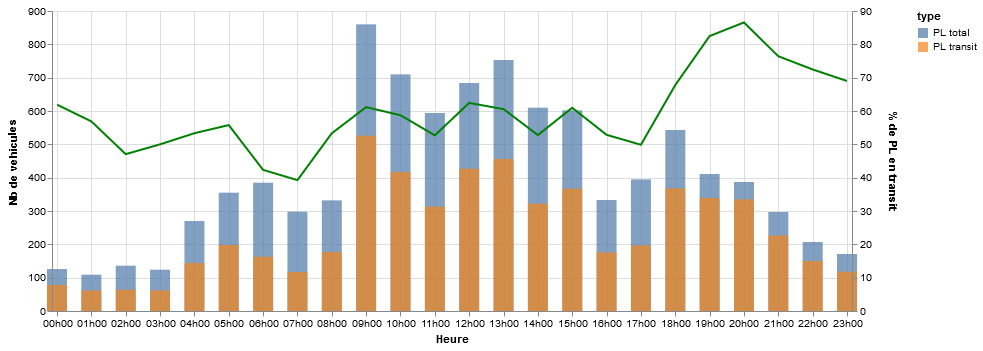

In [484]:
g.graph_VL_PL_transit_j_cam(synth_pl, '2019-02-05', 4)

## 7.2 Redressement au niveau de la Rocade

In [462]:
#determiner les passages fictifs
df_passage_transit_redresse, df_pl_redresse, trajets_rocade_non_vu=t.passages_fictif_rocade (
    t.liste_trajet_rocade, df_transit_filtre,passages_transit_filtre,df_passages_immat_ok)

In [463]:
#regrouper
%time synt_nb_veh_cam_redresse=t.pourcentage_pl_camera(df_pl_redresse,df_passage_transit_redresse)

Wall time: 4.64 s


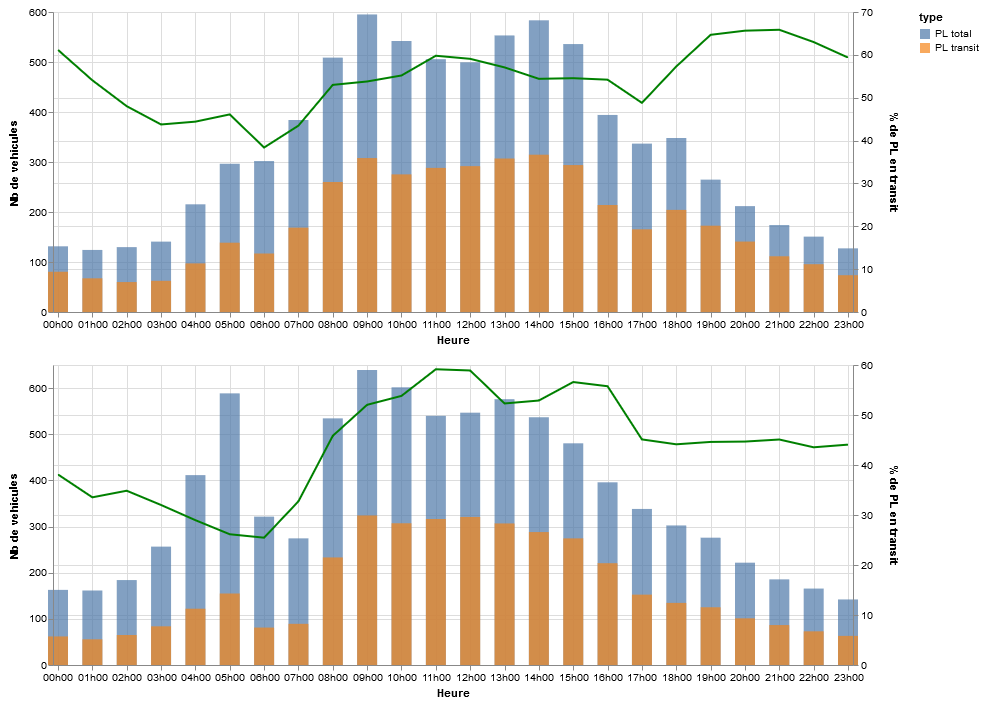

In [633]:
alt.vconcat(g.graph_VL_PL_transit_j_cam(synt_nb_veh_cam_redresse, 'JO', 4),g.graph_VL_PL_transit_j_cam(synt_nb_veh_cam_redresse, 'JO',3))

## 7.4. Grouper les réusltats par JO

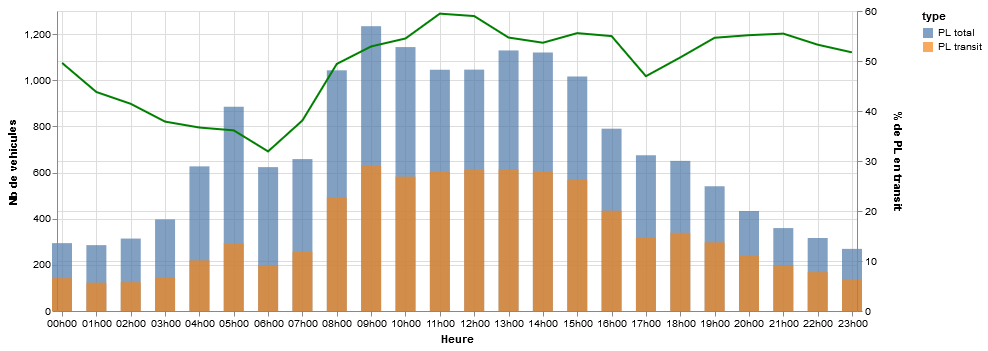

In [565]:
g.graph_VL_PL_transit_j_cam(synt_nb_veh_cam_redresse, 'JO',3,4)

## 7.5 Chiffre global de transit

In [505]:
#pourcentage global sur toutes les cameras
len(passages_transit)/len(df_passages_immat_ok)*100

54.01922762866395

In [519]:
#ciblé rocade Est avec prise en compte redressement
(len(df_passage_transit_redresse.loc[df_passage_transit_redresse['camera_id'].isin([9,10])]) / 
len(df_pl_redresse.loc[df_pl_redresse['camera_id'].isin([9,10])]))*100

32.16016694340978

# 8. Temps de parcours

In [26]:
# on cherche à obtenir le temps de parcours moyen pour une camera, sur un jour ou les jours ouvres, par o_d
# on construit donc une df avec : immat, cam, tps_parcours, heure_Rocade
# pour l'heure à la Rocade : on va cehrcher dans les df_passage le passage:qui a la mm immat, dont la cam est 1,2,3,4 et dont le created est compris entre date_cam1et date_cam2

#isoler les passages concernes par la Rocade
passage_rocade=dico_passag_final.loc[(dico_passag_final['camera_id'].isin([1,2,3,4]))]# & (dico_passag_final['correction_o_d']==False)]

In [36]:
#jointure entre les o_d et les passages
o_d_joint_rocade=dico_od_final.merge(passage_rocade, on='immat', how='left')

In [109]:
#limiter les o_d là ou date du passages est ciompris entre les date 1 et date 2 de l'o_d
dico_od_Rocade_final=o_d_joint_rocade.loc[(o_d_joint_rocade['date_cam_1']<o_d_joint_rocade['created']) & 
                                          (o_d_joint_rocade['created']<o_d_joint_rocade['date_cam_2']) & 
                                          (o_d_joint_rocade['tps_parcours']<pd.Timedelta('4H'))]

In [155]:
#limiter les 
limite_donnees=dico_od_Rocade_final[['date_cam_1','immat','o_d','tps_parcours','created']].rename(columns={'created':'h_rocade'})

In [181]:
#filtrer selon une date ou des jours ouvrés ou mardi/jeudi : 
"""filtre_donnees=limite_donnees.loc[(limite_donnees.apply(lambda x : x['h_rocade'].dayofyear==pd.to_datetime('2019-01-28').dayofyear,axis=1)) & 
                          (pour_graph['o_d']=='A10-A62')].copy()"""
filtre_donnees=limite_donnees.loc[(limite_donnees.set_index('h_rocade').index.dayofweek<5) & 
                          (limite_donnees['o_d']=='A10-A63')].copy()
"""filtre_donnees=limite_donnees.loc[(limite_donnees.set_index('h_rocade').index.dayofweek.isin([1,3])) & 
                          (limite_donnees['o_d']=='A10-A62')].copy()"""

"filtre_donnees=limite_donnees.loc[(limite_donnees.set_index('h_rocade').index.dayofweek.isin([1,3])) & \n                          (limite_donnees['o_d']=='A10-A62')].copy()"

In [182]:
#transformer les valeur de temps en integer pour agregation
filtre_donnees['tps_parcours2']=filtre_donnees['tps_parcours'].values.astype(np.int64)

In [ ]:
#mise en forme pour graph
groupe_h=filtre_donnees.set_index('h_rocade').resample('15T')['tps_parcours2'].mean()
#groupe_h['tps_parcours']=pd.to_timedelta(groupe_h['tps_parcours'])
groupe_h=pd.to_timedelta(groupe_h)
pour_graph=groupe_h.reset_index()
pour_graph['tps_parcours2']=pd.to_datetime('2019-01-31')+pour_graph['tps_parcours2']

In [ ]:
pour_graph

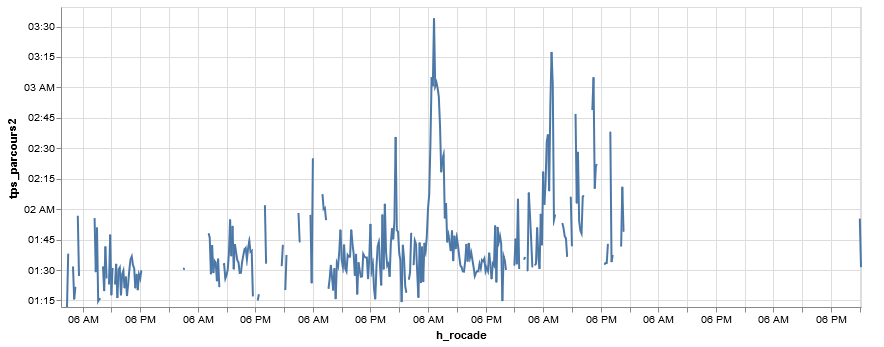

In [184]:
alt.Chart(pour_graph).mark_line().encode(
    x='h_rocade:T',
    y='tps_parcours2').properties(width=800)

In [ ]:
dico_od_final.loc[(dico_od_final['o_d']=='A10-A62') & (dico_od_final['date_cam_1']>pd.to_datetime('2019-01-28 21:00'))].sort_values('date_cam_1')

In [559]:
test=t.trajet(df_passages6.loc['2019-01-31 00:00:00':'2019-02-01 23:59:59'], '2019-01-31 08:15:00', 15, [8, 13],typeTrajet='Global',temps_max_autorise=18)

In [547]:
param_cluster=pd.read_json(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\param_cluster.json', orient='index')

In [563]:
visu=t.jointure_temps_reel_theorique(test.df_transit,dixco_tpsmax_corrige,t.liste_complete_trajet, 15)

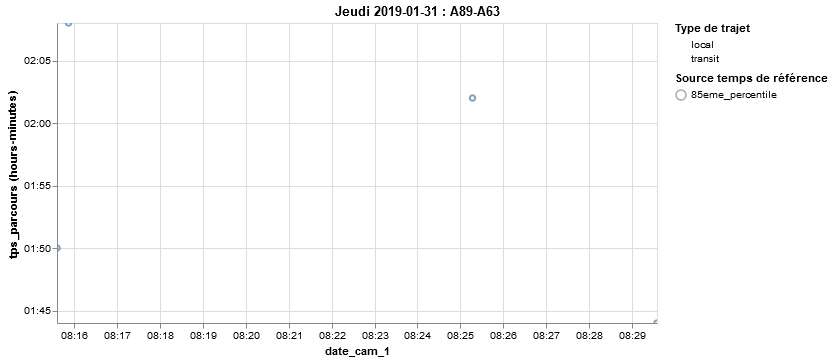

In [564]:
g.graph_transit_filtre(visu,'2019-01-31 00:00:00','2019-01-31 23:59:59','A89-A63')

# CORRIGER LES TEMPS DE PARCOURS LIMITES

In [162]:
#isoler les données : sur un jour pour une o_d
o_d='A10-A63'
date='2019-01-23'
test_predict=dico_df_transit['df_transit_marge0'].loc[(dico_df_transit['df_transit_marge0']['o_d']==o_d) &
             (dico_df_transit['df_transit_marge0'].set_index('date_cam_1').index.dayofyear==pd.to_datetime(date).dayofyear)].copy()

In [163]:
#ajouter des champsde ocnversion des dates en integer, limiter les valeusr sinon pb de mémoire avec sklearn
test_predict['date_int']=((test_predict.date_cam_1 - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))/1000000
test_predict['temps_int']=(((pd.to_datetime('2018-01-01')+test_predict.tps_parcours) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))/1000000

In [1074]:
#créer les données d'entrée du modele
X=np.array([[a,b] for a,b in zip(test_predict.date_int.tolist(),test_predict.temps_int.tolist())])
y=np.array(test_predict.filtre_tps.tolist())

In [1075]:
#créer le modele
ga=1000
C=35
clf = svm.SVC(kernel='rbf', gamma=ga, C=C)

In [1076]:
#alimenter le modele
clf.fit(liste_nsample_nfeat, n_sample)

SVC(C=35, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1077]:
#isoler les donner à tester
df_a_tester=test_predict.loc[(test_predict['filtre_tps']==0) & (test_predict['type']=='85eme_percentile')].copy()

In [1078]:
#liste à tester
liste_a_tester=np.array([[a,b] for a,b in zip(df_a_tester.date_int.tolist(),df_a_tester.temps_int.tolist())])
#dfde résultats de prédiction
df_type_predit=pd.DataFrame([[i, v] for i,v in zip(df_a_tester.index.tolist(),[clf.predict([x])[0] for x in liste_a_tester])], 
                            columns=['index_source','type_predit'])
#mise à jourde la df source
df_transit_avec_filtre.loc[df_transit_avec_filtre.index.isin(df_type_predit.index_source.tolist()),'type']='predit'
df_transit_avec_filtre.loc[df_transit_avec_filtre.index.isin(df_type_predit.loc[df_type_predit['type_predit']==1].index_source.tolist()),'filtre_tps']=1

In [1172]:
df_transit_avec_filtre.loc[df_transit_avec_filtre['type']=='predit']

Empty DataFrame
Columns: [date_cam_1, immat, l, state, id, date_cam_2, cameras, origine, destination, o_d, tps_parcours, period, date, temps, type, tps_parcours_theoriq, filtre_tps]
Index: []

Wall time: 1.69 s


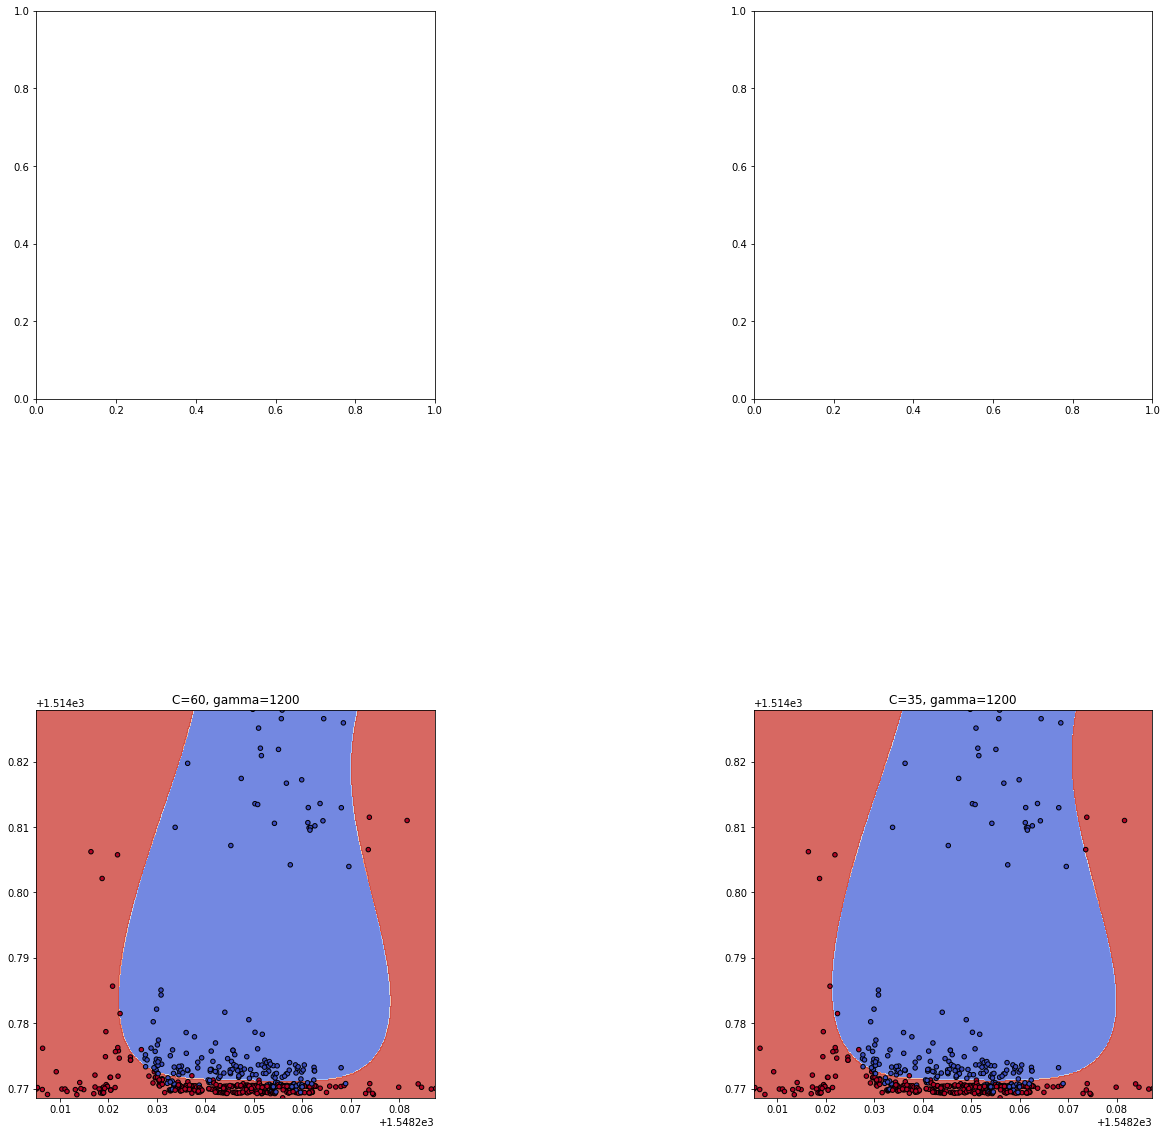

In [166]:
%%time
def make_meshgrid(x, y, h=.0002):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.000000001, x.max() + 0.000000001
    y_min, y_max = y.min() - 0.000000001, y.max() + 0.000000001
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X=np.array([[a,b] for a,b in zip(test_predict.date_int.tolist(),test_predict.temps_int.tolist())])
y=np.array(test_predict.filtre_tps.tolist())
#C = 25# SVM regularization parameter
models = (svm.SVC(kernel='rbf', gamma=600, C=70),
         svm.SVC(kernel='rbf', gamma=600, C=35),
         svm.SVC(kernel='rbf', gamma=500, C=100),
         svm.SVC(kernel='rbf', gamma=500, C=200))
models = (clf.fit(X, y) for clf in models)


# Set-up 2x2 grid for plotting.
fig, sub = plt.figure(figsize=(20,20)).subplots(2,2)
plt.subplots_adjust(wspace=0.8, hspace=0.8)

# title for the plots
titles = ('C=60, gamma=1200',
          'C=35, gamma=1200',
          'C=100, gamma=500',
          'C=200, gamma=500')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

#plt.show()
plt.savefig(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Projet Rapport\illustrations\impact_prediction_A10-A63.png')

In [ ]:
liste_od_ok=['A660-A62','A62-A63','A63-A62','A62-A10','A660-N10', 'A660-A10','N10-A63','A62-N10']
for od in [x for x in df_transit_avec_filtre.o_d.unique().tolist() if x not in liste_od_ok ] : 
    for date in set([a[0].strftime('%Y-%m-%d') for a in t.creer_liste_date('2019-01-31',11)]):
        try : 
            df_transit_avec_filtre=t.predire_type_trajet(df_transit_avec_filtre,od, date,600,35)
        except ValueError : 
            continue

# VERIF AFFECTATION CLUSTER

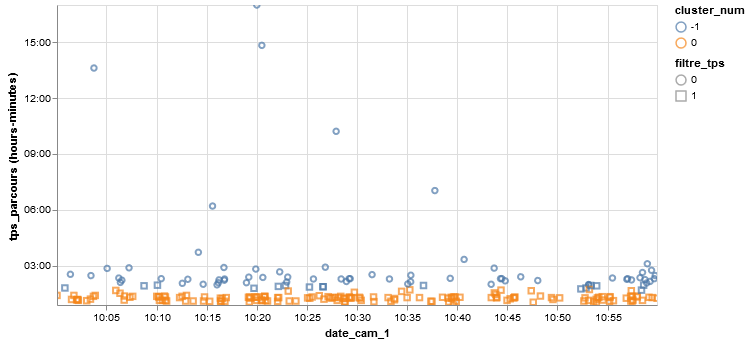

In [88]:
#test cluster
od='N10-A63'
date_debut='2019-01-23 10:00:00'
datefin='2019-01-23 11:00:00'
delai=1200
coeff=4
df_pl_ok=dico_df_transit['df_transit_marge15'].loc[(dico_df_transit['df_transit_marge15']['o_d']==od) &
                                   (dico_df_transit['df_transit_marge15']['date_cam_1'].between(pd.to_datetime(date_debut),pd.to_datetime(datefin)))]
donnees_src=df_pl_ok.loc[:,['date_cam_1','tps_parcours']].copy() #isoler les données necessaires
liste_valeur=donnees_src.tps_parcours.apply(lambda x : ((pd.to_datetime('2018-01-01')+x)-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')).tolist()#convertir les temps en integer
liste_date=donnees_src.date_cam_1.apply(lambda x :(x - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')).tolist()
liste=[[liste_date[i],liste_valeur[i]] for i in range(len(liste_valeur))]
if len(liste_valeur)<5 : #si il n'y a pas bcp de pl on arrete ; pourraitfair l'objet d'un parametre
    raise ClusterError()
#faire tourner la clusterisation et recupérer le label (i.e l'identifiant cluster) et le nombre de cluster
clustering=DBSCAN(eps=delai, min_samples=len(liste_valeur)/coeff).fit(liste)

labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# A AMELIORER EN CREANT UNE ERREUR PERSONALISEE SI ON OBTIENT  CLUSTER
if n_clusters_== 0 :
    print('vlaueError')
#mettre en forme au format pandas
results = pd.DataFrame(pd.DataFrame([donnees_src.index,labels]).T)
results.columns = ['index_base', 'cluster_num']
results = pd.merge(results,df_pl_ok, left_on='index_base', right_index=True )
graph_results=results[['date_cam_1','tps_parcours','filtre_tps','cluster_num']].copy()
graph_results.tps_parcours=pd.to_datetime('2018-01-01')+graph_results.tps_parcours
alt.Chart(graph_results).mark_point().encode(
                                x='date_cam_1',
                                y='hoursminutes(tps_parcours)',
                                tooltip='hoursminutes(tps_parcours)',
                                color='cluster_num:N',
                                shape='filtre_tps:N').interactive().properties(width=600)

# TESTS

In [410]:
pour_graph=toto.loc[(toto.apply(lambda x : x['created'].dayofyear==pd.to_datetime('2019-02-05').dayofyear,axis=1))&
                 (toto['camera_id']==3)]

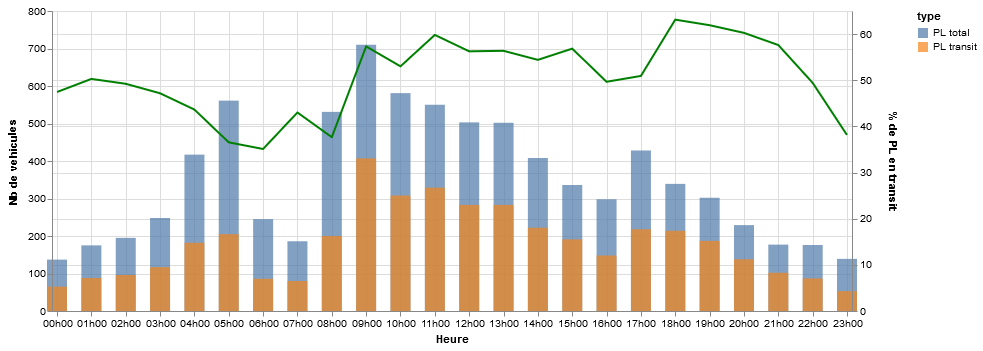

In [411]:
#graphique
base=alt.Chart(pour_graph).encode(x=alt.X('created', axis=alt.Axis(title='Heure', format='%Hh%M')))
bar = base.mark_bar(opacity=0.7, size=20).encode(
    y=alt.Y('nb_veh:Q',stack=None, axis=alt.Axis(title='Nb de vehicules')),
    color='type')
line=base.mark_line(color='green').encode(y=alt.Y('pct_pl_transit:Q', axis=alt.Axis(title='% de PL en transit')))
(bar+line).resolve_scale(y='independent').properties(width=800) 

In [406]:
toto=df_pl_concat.merge(df_pct_pl[['created','camera_id','pct_pl_transit']], on=['created','camera_id'])

In [571]:
synt_nb_veh_cam_redresse['heure']=synt_nb_veh_cam_redresse.created.dt.hour
groupe_jo=synt_nb_veh_cam_redresse.loc[synt_nb_veh_cam_redresse.set_index('created').index.dayofweek < 5].groupby(['camera_id','heure','type']).mean().reset_index()
groupe_jo['created']=groupe_jo.apply(lambda x : pd.to_datetime(0)+pd.Timedelta(str(x['heure'])+'H'),axis=1)
filtre_rocade=groupe_jo.loc[groupe_jo['camera_id'].isin([3,4])].sort_values(['heure','camera_id'])
filtre_rocade_jo=filtre.groupby(['heure','type']).agg({'nb_veh':'sum','pct_pl_transit':'mean','created':'min'}).reset_index()

In [611]:
#ouvrir trafic rocade
traf_dira_rocade=pd.read_csv(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\trafics_dira_rocade.csv')
traf_dira_rocade['date']=pd.to_datetime(traf_dira_rocade['date'])
traf_dira_rocade_jo=traf_dira_rocade.loc[traf_dira_rocade.set_index('date').index.dayofweek < 5].groupby('heure').mean().reset_index()

In [631]:
lien_traf_gest_traf_lapi=traf_dira_rocade_jo.merge(filtre_rocade_jo, on='heure')
lien_traf_gest_traf_lapi=lien_traf_gest_traf_lapi.loc[lien_traf_gest_traf_lapi['type']=='PL total']
lien_traf_gest_traf_lapi.rename(columns={'nb_veh_x':'nb_veh_siredo','nb_veh_y':'nb_veh_lapi'},inplace=True)
lien_traf_gest_traf_lapi['nb_veh_transit_lapi']=lien_traf_gest_traf_lapi['nb_veh_lapi']*lien_traf_gest_traf_lapi['pct_pl_transit']*0.01
lien_traf_gest_traf_lapi['pct_detec_lapi']=lien_traf_gest_traf_lapi['nb_veh_lapi']/lien_traf_gest_traf_lapi['nb_veh_siredo']
lien_traf_gest_traf_lapi['nb_veh_lapi_recale']=lien_traf_gest_traf_lapi['nb_veh_lapi']*(1-lien_traf_gest_traf_lapi['pct_detec_lapi'])
lien_traf_gest_traf_lapi['pct_pl_transit_max']=((lien_traf_gest_traf_lapi['nb_veh_transit_lapi']+lien_traf_gest_traf_lapi['nb_veh_lapi_recale']) / 
                                                (lien_traf_gest_traf_lapi['nb_veh_lapi']+lien_traf_gest_traf_lapi['nb_veh_lapi_recale']))*100
lien_traf_gest_traf_lapi['pct_pl_transit_min']=(lien_traf_gest_traf_lapi['nb_veh_transit_lapi']/ 
                                                (lien_traf_gest_traf_lapi['nb_veh_lapi']+lien_traf_gest_traf_lapi['nb_veh_lapi_recale']))*100

In [661]:
lien_traf_gest_traf_lapi[['created','pct_pl_transit','pct_pl_transit_max']].head(5)

created  pct_pl_transit  pct_pl_transit_max
0 1970-01-01 00:00:00       49.627697           60.056873
2 1970-01-01 01:00:00       43.800967           55.301460
4 1970-01-01 02:00:00       41.440480           49.757740
6 1970-01-01 03:00:00       37.879753           40.352226
8 1970-01-01 04:00:00       36.691287           19.429075

In [663]:
#graphique
base=alt.Chart(lien_traf_gest_traf_lapi).encode(x=alt.X('created', axis=alt.Axis(title='Heure', format='%Hh%M')))
line_siredo=base.mark_line(color='green').encode(y=alt.Y('nb_veh_siredo:Q', axis=alt.Axis(title='Nombre de PL SIREDO')))
line_pct_pl_lapi=base.mark_line(color='blue').encode(y=alt.Y('pct_pl_transit:Q', axis=alt.Axis(title='Nombre de PL SIREDO')))
(line_siredo+line_pct_pl_lapi)
line_pct_max=base.mark_area(baseline='pct_pl_transit_min').encode(y='pct_pl_transit_max')
line_pct_min=base.mark_line().encode(y='pct_pl_transit_min')
line_pct_max+line_pct_pl_lapi

SchemaValidationError: Invalid specification

        altair.vegalite.v2.schema.core.MarkDef->baseline, validating 'enum'

        'pct_pl_transit_min' is not one of ['top', 'middle', 'bottom']
        

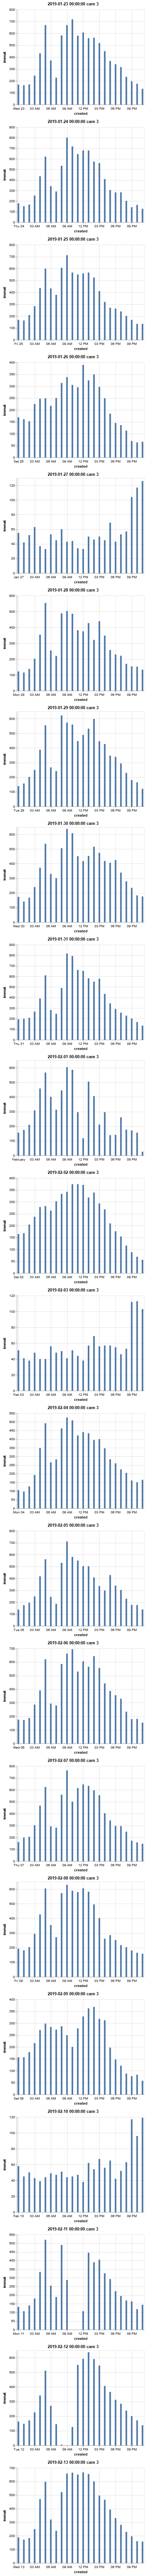

In [651]:
g.graph_nb_veh_jour_camera_multi_j(df_passages_immat_ok.reset_index(), '2019-01-23 00:00:00', '2019-01-23 23:59:59',3,22,'PL')

In [650]:
df_passages_immat_ok.loc[(df_passages_immat_ok.index.hour==5) & (df_passages_immat_ok['camera_id']==3) ]

index  camera_id  \
created                                   
2019-01-23 05:00:08   529582          3   
2019-01-23 05:00:19   529585          3   
2019-01-23 05:00:26   529588          3   
2019-01-23 05:00:40   529592          3   
2019-01-23 05:00:43   529595          3   
2019-01-23 05:00:48   529597          3   
2019-01-23 05:00:52   529600          3   
2019-01-23 05:00:54   529602          3   
2019-01-23 05:00:56   529603          3   
2019-01-23 05:00:58   529605          3   
2019-01-23 05:01:03   529607          3   
2019-01-23 05:01:06   529608          3   
2019-01-23 05:01:11   529610          3   
2019-01-23 05:01:15   529611          3   
2019-01-23 05:01:17   529612          3   
2019-01-23 05:01:17   529613          3   
2019-01-23 05:01:19   529614          3   
2019-01-23 05:01:23   529615          3   
2019-01-23 05:01:25   529617          3   
2019-01-23 05:01:29   529618          3   
2019-01-23 05:01:36   529621          3   
2019-01-23 05:01:38   529622          3   
2019-01-23 05:01:40   529623          3   
2019-01-23 05:01:42   529624          3   
2019-01-23 05:01:54   529628          3   
2019-01-23 05:01:57   529629          3   
2019-01-23 05:02:01   529631          3   
2019-01-23 05:02:27   529638          3   
2019-01-23 05:02:33   529639          3   
2019-01-23 05:02:36   529640          3   
...                      ...        ...   
2019-02-13 05:55:59  6410782          3   
2019-02-13 05:56:06  6410789          3   
2019-02-13 05:56:15  6410798          3   
2019-02-13 05:56:19  6410800          3   
2019-02-13 05:56:24  6410802          3   
2019-02-13 05:56:26  6410803          3   
2019-02-13 05:56:34  6410810          3   
2019-02-13 05:56:38  6410814          3   
2019-02-13 05:56:50  6410829          3   
2019-02-13 05:57:03  6410838          3   
2019-02-13 05:57:15  6410852          3   
2019-02-13 05:57:15  6410851          3   
2019-02-13 05:57:23  6410858          3   
2019-02-13 05:57:27  6410861          3   
2019-02-13 05:57:33  6410862          3   
2019-02-13 05:57:38  6410867          3   
2019-02-13 05:57:45  6410871          3   
2019-02-13 05:57:47  6410873          3   
2019-02-13 05:57:50  6410877          3   
2019-02-13 05:57:53  6410879          3   
2019-02-13 05:57:58  6410884          3   
2019-02-13 05:58:03  6410889          3   
2019-02-13 05:58:16  6410902          3   
2019-02-13 05:58:17  6410903          3   
2019-02-13 05:58:44  6410917          3   
2019-02-13 05:58:56  6410928          3   
2019-02-13 05:59:14  6410945          3   
2019-02-13 05:59:22  6410948          3   
2019-02-13 05:59:25  6410952          3   
2019-02-13 05:59:55  6410969          3   

                                                        immat  fiability    l  \
created                                                                         
2019-01-23 05:00:08  dca5d7ce4a130ec09c811cf48e3bab36742eecc3         59  1.0   
2019-01-23 05:00:19  413ee0366c43bf194e02116b25229ba6c1c15cc3         99  1.0   
2019-01-23 05:00:26  3d70146ca493bcf3ebb05b55b316303566fe2500         99  1.0   
2019-01-23 05:00:40  65de896f0488095ac8d97fd874ec1a9aa238753f         99  1.0   
2019-01-23 05:00:43  d4f724b2060e219998e64b1186bedf3b3d7a3921         99  1.0   
2019-01-23 05:00:48  9b9908ae4668f89e325f6d29b35506d5ceab424c         99  1.0   
2019-01-23 05:00:52  ccb870d5a1be9d4d598468e3ac942e88ed629eb4         77  1.0   
2019-01-23 05:00:54  b89223a56582587b2de045c03aff52c51d984458         99  1.0   
2019-01-23 05:00:56  e8bdd75c803546db3b6ea549b011b5ba5b1fe1b0         57  1.0   
2019-01-23 05:00:58  d4f04b23c5face52f389b6daf58f5752ed24501c         89  1.0   
2019-01-23 05:01:03  3a09ad0ee1c802fdbb8a813aaf29e7dc2d825180         99  1.0   
2019-01-23 05:01:06  583b92392565367542e80374b4ef7744c4961156         99  1.0   
2019-01-23 05:01:11  610d55f942124fed68f515df41276454c5130784         99  1.0   
2019-01-23 05:01:15  daea753952321c6d2def0c982be58eda6574198e         99  1.0   
2019-01-23 05:01:

In [667]:
passages_transit_decale1h['created']=passages_transit_decale1h['created']+pd.Timedelta('1H')

In [668]:
passages_transit_decale1h.head(5)

created  camera_id                                     immat  \
0  2019-01-23 01:22:09         15  e8253b48cafa556d2bc4d077d97fa9dee507c3ee   
1  2019-01-23 01:52:53         19  e8253b48cafa556d2bc4d077d97fa9dee507c3ee   
2  2019-01-23 02:18:19          4  e8253b48cafa556d2bc4d077d97fa9dee507c3ee   
3  2019-01-23 13:47:44          5  e8253b48cafa556d2bc4d077d97fa9dee507c3ee   
28 2019-02-05 18:41:22          6  e8253b48cafa556d2bc4d077d97fa9dee507c3ee   

    fiability    l state  
0          99  1.0    ES  
1          99  1.0    ES  
2          59  1.0    ES  
3          99  1.0    ES  
28         99  1.0    ES